In [3]:
%matplotlib inline
from vj_processing import *
from IPython.display import clear_output
pixmapfile = '../data/PixelMaps/Storage/PixelMaps/K2_target_pixels.hdf5'

In [51]:
ccd = CCD(module=6, channel=2, campaign=8, field='FLUX')
cont = PixelMapContainer.from_hdf5(pixmapfile, ccd)
gen = PixMapGenerator(cont, cache=True)

In [52]:
meds = np.array([np.nanmedian(gen.get_unordered(i)) for i in xrange(N)])

In [53]:
t = 0.02043229*np.arange(N)+2559.06849083

(2559.06849083, 2637.7736719099998)

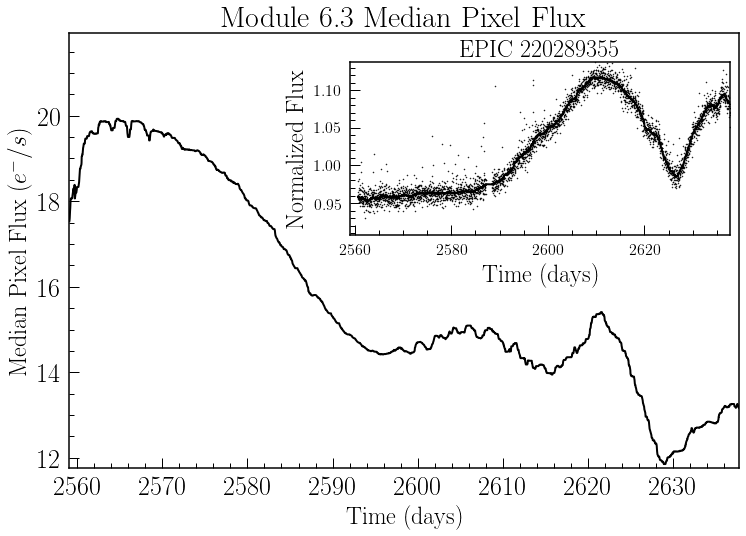

In [67]:
fig, ax = subplots(1,1, figsize=(12,8))
ax.set_title('Module 6.3 Median Pixel Flux', fontsize=30)
ax.set_ylabel('Median Pixel Flux $(e^{-}/s)$', fontsize=24)
ax.set_xlabel('Time (days)', fontsize=24)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(26) 

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(26) 
    
plotNiceIntervals(ax, t, meds, color='k', N=60)
ax.lines[-2].set_visible(False)
m = np.nanmean(meds)
s = np.nanstd(meds)
ax.set_ylim(m-0.9*s, m+1.2*s)
ax.set_xlim(t[0], t[-1])

EPIC = 220289355
url = get_vj_url(EPIC, 8)
hdu = next(fits_downloader([url]))
flux = hdu[1].data['FCOR']
tt = hdu[1].data['T']
ax2 = ax.figure.add_axes([0.45,0.53,0.44,0.3])
ax2.set_title('EPIC %i' % EPIC, fontsize=24)
ax2.set_xlabel('Time (days)', fontsize=24)
ax2.set_ylabel('Normalized Flux', fontsize=24)
plotNiceIntervals(ax2, tt, flux, color='k', N=60)

m = np.nanmean(flux)
s = np.nanstd(flux)
ax2.set_ylim(m-2.0*s, m+2.0*s)
ax2.set_xlim(t[0], t[-1])


In [43]:
totals = np.array([len(gen.get_unordered(i)) for i in xrange(N)])

per_cadence = np.median(totals)
total = np.sum(totals)

print per_cadence
print total

30113.0
115633920


(2559.06849083, 2637.7736719099998)

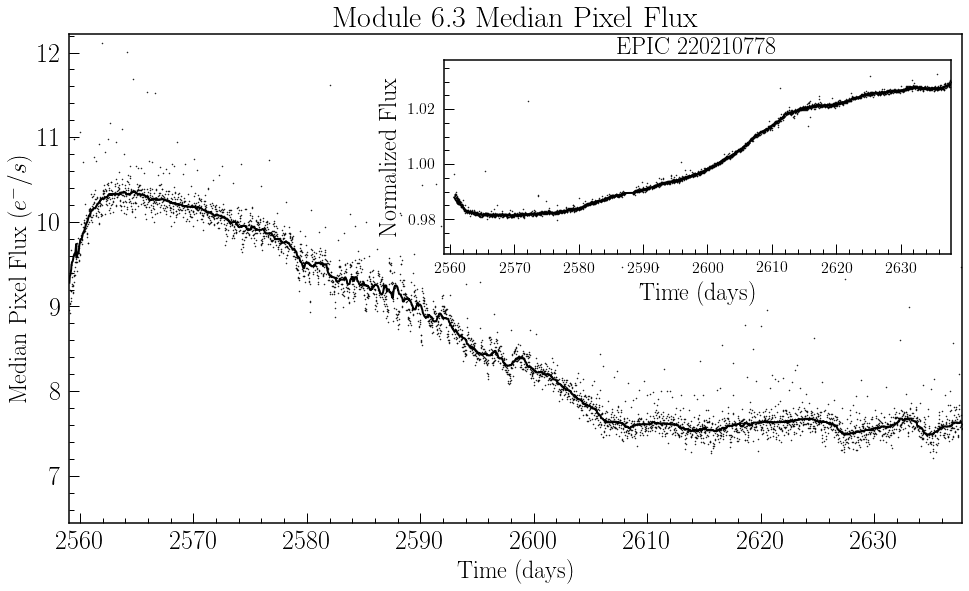

In [47]:
ccd = CCD(module=22, channel=0, campaign=8, field='FLUX')
cont = PixelMapContainer.from_hdf5(pixmapfile, ccd)
gen = PixMapGenerator(cont, cache=True)
meds = np.array([np.nanmedian(gen.get_unordered(i)) for i in xrange(N)])
t = 0.02043229*np.arange(N)+2559.06849083
fig, ax = subplots(1,1, figsize=(16,9))
ax.set_title('Module 6.3 Median Pixel Flux', fontsize=30)
ax.set_ylabel('Median Pixel Flux $(e^{-}/s)$', fontsize=24)
ax.set_xlabel('Time (days)', fontsize=24)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(26) 

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(26) 
    
plotNiceIntervals(ax, t, meds, color='k', N=60)
m = np.nanmean(meds)
s = np.nanstd(meds)
ax.set_ylim(m-0.7*s, m+1.0*s)
ax.set_xlim(t[0], t[-1])

EPIC = 220210778
url = get_vj_url(EPIC, 8)
hdu = next(fits_downloader([url]))
flux = hdu[1].data['FCOR']
tt = hdu[1].data['T']
ax2 = ax.figure.add_axes([0.45,0.54,0.44,0.3])
ax2.set_title('EPIC %i' % EPIC, fontsize=24)
ax2.set_xlabel('Time (days)', fontsize=24)
ax2.set_ylabel('Normalized Flux', fontsize=24)
plotNiceIntervals(ax2, tt, flux, color='k', N=60)

m = np.nanmean(flux)
s = np.nanstd(flux)
ax2.set_ylim(m-2.0*s, m+2.0*s)
ax2.set_xlim(t[0], t[-1])
